Dataset came from Kaggle => https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction?select=movies.csv

In [1]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_rows', 10)

In [2]:
filename = './movies.csv'
movies_df = pd.read_csv(filename, skipinitialspace = True)
movies_df.info()
movies_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


Initial Observations: <br>
1. There are many missing/null values in the Year, Genre, Rating, Votes, Runtime, Gross
2. Year and Gross should be an integer. However, Year has ranges and need to determine what to do about them
3. May of the columns have "\n" and need to remove that


In [3]:
# copy of original  dataset
movies_df2 = movies_df.copy()

In [4]:
movies_df.columns = ['Movies', 'Year', 'Genre', 'Rating', 'One-line', 'Start', 'Votes', 'Runtime', 'Gross']

In [5]:
movies_df.columns

Index(['Movies', 'Year', 'Genre', 'Rating', 'One-line', 'Start', 'Votes',
       'Runtime', 'Gross'],
      dtype='object')

In [6]:
movies_df.duplicated().sum()
# 431 duplicates


431

In [7]:
movies_df = movies_df.drop_duplicates()
movies_df.duplicated().sum()

0

In [8]:
# checking null values
missing_values_count= movies_df.isna().sum()
missing_values_count

Movies         0
Year         542
Genre         78
Rating      1400
One-line       0
Start          0
Votes       1400
Runtime     2560
Gross       9108
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem: <br>
Resource: https://www.kaggle.com/code/alexisbcook/handling-missing-values gave me the inspiration to determine the percentage of missed values

In [9]:
# how many total missing values do we have?
total_cells = np.product(movies_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f"There is {percent_missing.round(decimals=2)}% missing data" )

There is 17.52% missing data


<Axes: >

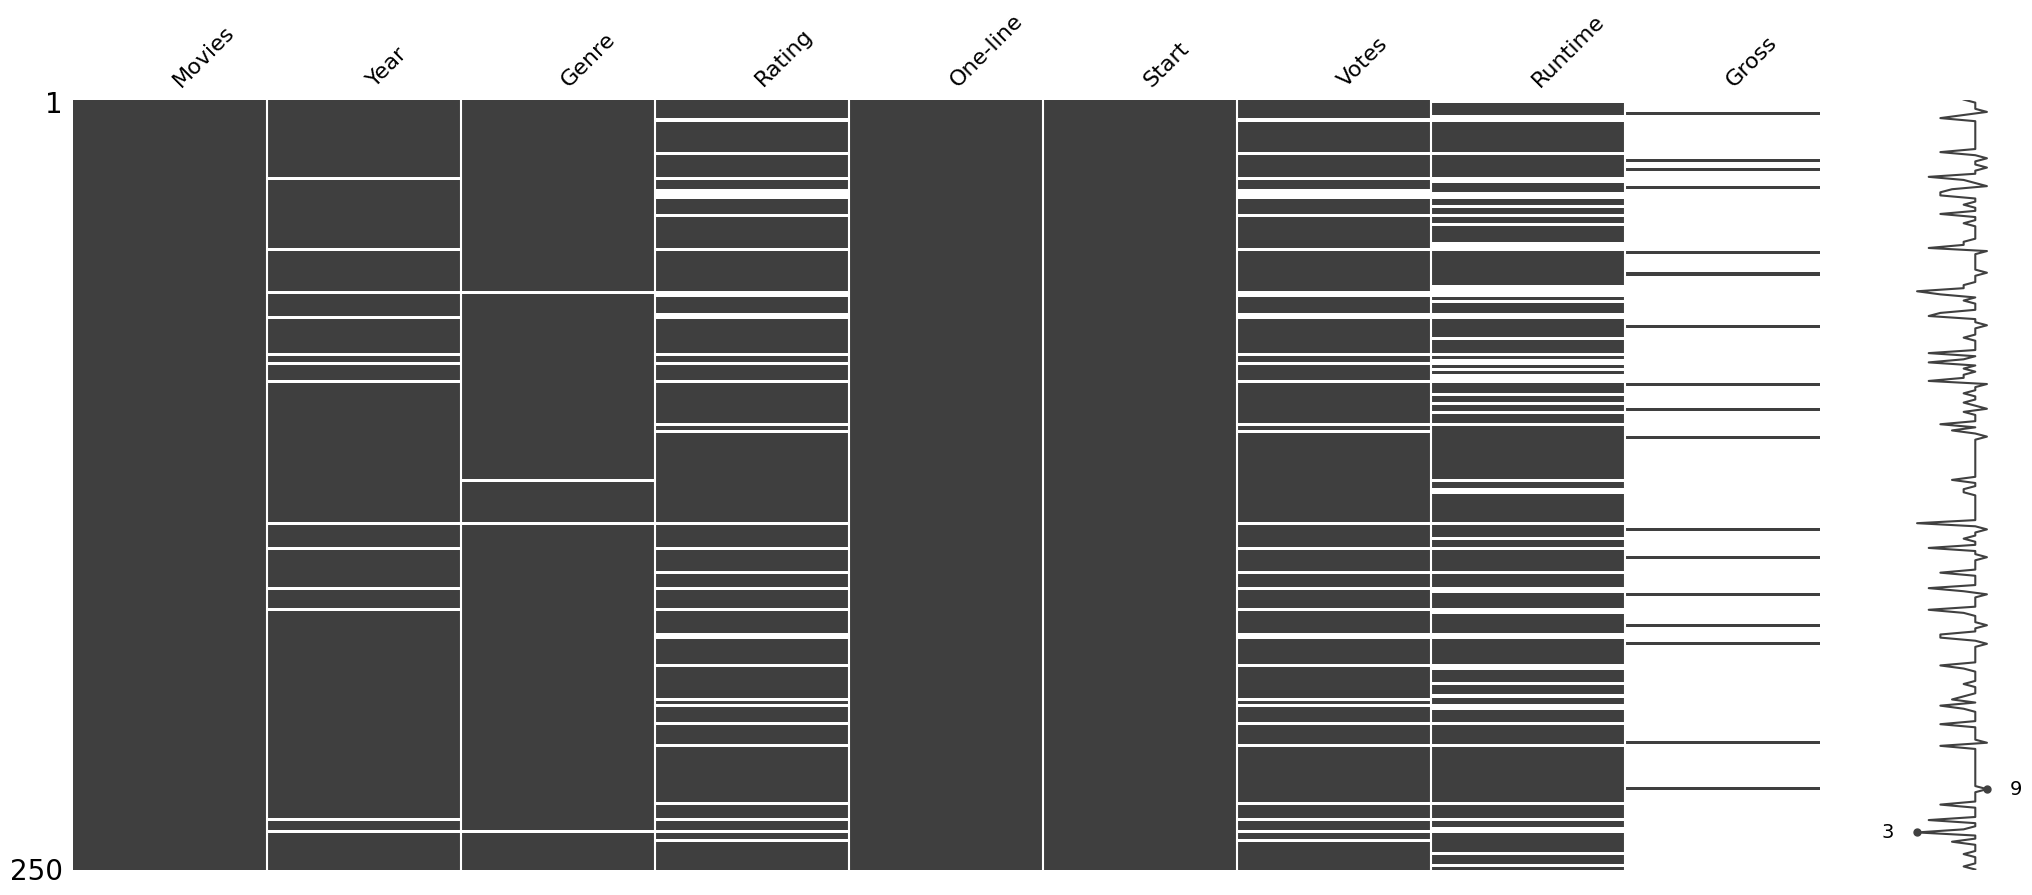

In [10]:
# visual missind data
import missingno as msno
%matplotlib inline
msno.matrix(movies_df.sample(250))

In [11]:

def check_df_null_percentage(df):
    missing_values_count= df.isna().sum()
    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()
    percent_missing = (total_missing/total_cells) * 100
    total_rows = df.shape[0]
    # created percentage null checks for each row 
    for col in df:
        series = df[col]
        each_series_null_values = series.isna().sum()
        percentage_each_series = (each_series_null_values/total_rows) * 100
        percentage_each_series_df  = (each_series_null_values/total_cells) * 100
        text = (
            f'''Series column {col} has {each_series_null_values} missing values which is 
            {percentage_each_series.round(decimals=2)} % of row data or 
            {percentage_each_series_df.round(decimals=2)} of the whole dataset'''
        )
        print(text)
    print(f"There is {percent_missing.round(decimals=2)}% missing data in your dataset" )
    

Created function to check the percentage of missed data 

In [12]:
check_df_null_percentage(movies_df)

Series column Movies has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Year has 542 missing values which is 
            5.66 % of row data or 
            0.63 of the whole dataset
Series column Genre has 78 missing values which is 
            0.82 % of row data or 
            0.09 of the whole dataset
Series column Rating has 1400 missing values which is 
            14.63 % of row data or 
            1.63 of the whole dataset
Series column One-line has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Start has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Votes has 1400 missing values which is 
            14.63 % of row data or 
            1.63 of the whole dataset
Series column Runtime has 2560 missing values which is 
            26.76 % of row data or 
            2.97 of the whole d

Columns to Keep --> <br/> Movies, 
Columns to Drop rows/columns --> <br/> Genre rows, Gross column
Columns to Fill in --> <br/> Year, Rating, Votes, Runtime


In [13]:
movies_df = movies_df.drop('Gross', axis = 1)




In [14]:
# movies_df= movies_df.dropna(axis = 0, how = 'all')
movies_df.dropna(axis=0, how="any", subset=['Genre'], inplace=True)

In [15]:
movies_df.isna().sum()

Movies         0
Year         501
Genre          0
Rating      1333
One-line       0
Start          0
Votes       1333
Runtime     2491
dtype: int64

https://gist.github.com/smram/d6ded3c9028272360eb65bcab564a18a

https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells

https://regexr.com/3fkiv

https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/


In [16]:
def cleanStringData(df):
    df = df.replace(r'\r+|\n+|\t+|\(+|\)+|','', regex=True)
    new_df = pd.DataFrame()
    for col in df:
        series = df[col]
        # check column data type
        if series.dtype == 'object':
            series = series.str.strip()
            new_df[col] = series
        else:
            new_df[col] = series
    return new_df

Visualizes Missed Data: https://github.com/ResidentMario/missingno

In [17]:
movies_df = cleanStringData(movies_df)
movies_df

,Movies,Year,Genre,Rating,One-line,Start,Votes,Runtime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN
...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022–,"Drama, Thriller",NaN,Add a Plot,"Director:Nicolai Rohde| Stars:Felix Klare,...",NaN,NaN
9995,Arcane,2021–,"Animation, Action, Adventure",NaN,Add a Plot,,NaN,NaN
9996,Heart of Invictus,2022–,"Documentary, Sport",NaN,Add a Plot,Director:Orlando von Einsiedel| Star:Princ...,NaN,NaN
9997,The Imperfects,2021–,"Adventure, Drama, Fantasy",NaN,Add a Plot,Director:Jovanka Vuckovic| Stars:Morgan Ta...,NaN,NaN


In [18]:
# checking to make sure extra white space is taken out
movies_df['Genre'].unique()

array(['Action, Horror, Thriller', 'Animation, Action, Adventure',
       'Drama, Horror, Thriller', 'Animation, Adventure, Comedy',
       'Action, Crime, Horror', 'Action, Crime, Drama', 'Drama, Romance',
       'Crime, Drama, Mystery', 'Comedy', 'Action, Adventure, Thriller',
       'Crime, Drama, Fantasy', 'Drama, Horror, Mystery',
       'Comedy, Drama, Romance', 'Crime, Drama, Thriller', 'Drama',
       'Comedy, Drama', 'Drama, Fantasy, Horror', 'Comedy, Romance',
       'Action, Adventure, Drama', 'Crime, Drama',
       'Drama, History, Romance', 'Horror, Mystery', 'Comedy, Crime',
       'Action, Drama, History', 'Action, Adventure, Crime',
       'Action, Adventure, Fantasy', 'Action, Crime, Mystery',
       'Drama, Fantasy, Romance', 'Drama, Sci-Fi, Thriller',
       'Biography, Drama, History', 'Crime, Thriller',
       'Comedy, Crime, Drama', 'Drama, Mystery, Thriller',
       'Action, Adventure, Mystery', 'Action, Comedy',
       'Crime, Drama, Horror', 'Drama, Mystery, Sc

Need to remove commas from Votes and concatenate "-present" to Year

In [19]:
# removing the commas from this series
movies_df['Votes'] = movies_df['Votes'].str.replace(',','')

movies_df['Votes']

0        21062
1        17870
2       885805
3       414849
4          NaN
         ...  
9993       NaN
9995       NaN
9996       NaN
9997       NaN
9998       NaN
Name: Votes, Length: 9490, dtype: object

In [20]:
# movies_df['Year'] = movies_df['Year'].replace.str.
movies_df['Year'].unique()

array(['2021', '2021–', '2010–2022', '2013–', '2020–', '2006–2013',
       '2019–', '2016–2021', '2011–', '2005–', '2008–2013', '2017–',
       '2017–2021', '2016–', '1994–2004', '2014–', '2013–2020', '2015–',
       '2005–2020', '2013–2022', '2003–', '2009–2020', 'I 2018–',
       '2010–2015', '2011–2019', '2015–2020', '2005–2014', '2009–2015',
       '2008–2014', '2016–2018', '2009–2017', '2020', '2018–2021',
       '2017–2020', '1987–1994', '2018–', '2012–', '2014–2020',
       '2011–2018', '2005–2017', '2017', '2007–2015', '2000–2007',
       'II 2007–', '1993', '1999–2022', '2015–2018', '2014–2019', '2016',
       '2012–2020', '2013–2019', '2007–2012', '2011–2020', '2010–2017',
       '2000–2015', '2015–2021', '2001', '1997–', '2011–2017',
       '1993–1999', '1989–1998', '2010–2013', '2010–2020', '2003–2019',
       'I 2019', '2017–2019', '1975', '2005–2008', '1995–2001', '2006',
       '2015–2017', '2008–2020', '1984–1996', '2010–', '2014', '2000',
       '2013–2018', '2009–2016

It appears that they are letters mixed up with this column and need to get rid of them 


In [21]:
# movies_df['Year'] = movies_df['Year'].str.replace(r'\D+[a-z\%\$\#\@\!\-\_]', '', regex=True)

movies_df['Year'] = movies_df['Year'].str.replace(r'[a-zA-Z]', '', regex=True)
# https://automatetheboringstuff.com/2e/chapter7/
movies_df['Year'] = movies_df['Year'].str.replace(r'[^0-9]$', '-present', regex=True)
movies_df['Year'].unique()

array(['2021', '2021-present', '2010–2022', '2013-present',
       '2020-present', '2006–2013', '2019-present', '2016–2021',
       '2011-present', '2005-present', '2008–2013', '2017-present',
       '2017–2021', '2016-present', '1994–2004', '2014-present',
       '2013–2020', '2015-present', '2005–2020', '2013–2022',
       '2003-present', '2009–2020', ' 2018-present', '2010–2015',
       '2011–2019', '2015–2020', '2005–2014', '2009–2015', '2008–2014',
       '2016–2018', '2009–2017', '2020', '2018–2021', '2017–2020',
       '1987–1994', '2018-present', '2012-present', '2014–2020',
       '2011–2018', '2005–2017', '2017', '2007–2015', '2000–2007',
       ' 2007-present', '1993', '1999–2022', '2015–2018', '2014–2019',
       '2016', '2012–2020', '2013–2019', '2007–2012', '2011–2020',
       '2010–2017', '2000–2015', '2015–2021', '2001', '1997-present',
       '2011–2017', '1993–1999', '1989–1998', '2010–2013', '2010–2020',
       '2003–2019', ' 2019', '2017–2019', '1975', '2005–2008',


In [22]:
median_rating  = movies_df['Rating'].median()
movies_df['Rating'].fillna(median_rating, inplace=True)

In [23]:
movies_df['Rating'].isna().sum()

0

In [24]:
movies_df['Rating']

0       6.1
1       5.0
2       8.2
3       9.2
4       7.1
       ... 
9993    7.1
9995    7.1
9996    7.1
9997    7.1
9998    7.1
Name: Rating, Length: 9490, dtype: float64

In [25]:
median_voting = movies_df['Votes'].median()
movies_df['Votes'].fillna(median_voting, inplace=True)
movies_df['Votes'].isna().sum()


0

In [26]:
movies_df['Votes']

0        21062
1        17870
2       885805
3       414849
4        796.0
         ...  
9993     796.0
9995     796.0
9996     796.0
9997     796.0
9998     796.0
Name: Votes, Length: 9490, dtype: object

Why did this work when some rows the columns are nan? I thought the data needed to be a integer?

In [27]:
# movies_df.isna().sum()
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'])
movies_df.dtypes

Movies       object
Year         object
Genre        object
Rating      float64
One-line     object
Start        object
Votes       float64
Runtime     float64
dtype: object

In [35]:
check_df_null_percentage(movies_df)

Series column Movies has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Year has 501 missing values which is 
            5.28 % of row data or 
            0.66 of the whole dataset
Series column Genre has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Rating has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column One-line has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Start has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Votes has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Runtime has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
There is 0.66%

In [33]:
median_runtime = movies_df['Runtime'].median()
movies_df['Runtime'].fillna(median_runtime, inplace=True)
movies_df['Runtime'].isna().sum()

0

In [36]:
movies_df['Runtime'].unique()

array([121.,  25.,  44.,  23.,  60.,  50., 110.,  53.,  30., 114.,  42.,
       107.,  41.,  49.,  51., 109.,  22.,  43., 136.,  46.,  45.,  58.,
        24.,  70.,  64., 148., 395., 101.,  95.,  32., 118.,  47.,  31.,
       104., 127.,  54.,  92.,  88.,  59.,  55., 178.,  16.,  48.,  99.,
       124., 151., 100.,  40., 149., 119.,  20.,  87., 111.,  91., 117.,
       135., 129., 113.,  15.,  85., 169.,  97., 116., 138., 137., 209.,
       201., 123.,  96., 572., 467., 140.,  56., 112., 125., 145., 128.,
       147.,  90.,  98.,  26., 115., 156., 179., 108.,  34.,  11., 152.,
        94., 133., 298.,  28., 126., 102., 106., 385., 122., 452., 120.,
       494., 240., 134.,  80.,  89.,  35., 216., 296., 143., 164., 386.,
       363., 150., 105., 131.,  65., 103.,  86.,  52., 356., 154., 130.,
       491., 132.,  93.,  82., 370.,  18., 228.,  84., 280.,  78., 316.,
       264.,  83.,  81., 270., 197., 347., 267.,  37., 230., 233.,  21.,
       220., 331.,  39.,   9., 281.,  10., 557.,  3

In [41]:
shows_filter = movies_df['Runtime'] <= 60
movies_df[shows_filter]

,Movies,Year,Genre,Rating,One-line,Start,Votes,Runtime
1,Masters of the Universe: Revelation,2021-present,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870.0,25.0
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805.0,44.0
3,Rick and Morty,2013-present,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849.0,23.0
4,Army of Thieves,2021,"Action, Crime, Horror",7.1,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,796.0,60.0
5,Outer Banks,2020-present,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cline, Madison Bai...",25858.0,50.0
...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022-present,"Drama, Thriller",7.1,Add a Plot,"Director:Nicolai Rohde| Stars:Felix Klare,...",796.0,60.0
9995,Arcane,2021-present,"Animation, Action, Adventure",7.1,Add a Plot,,796.0,60.0
9996,Heart of Invictus,2022-present,"Documentary, Sport",7.1,Add a Plot,Director:Orlando von Einsiedel| Star:Princ...,796.0,60.0
9997,The Imperfects,2021-present,"Adventure, Drama, Fantasy",7.1,Add a Plot,Director:Jovanka Vuckovic| Stars:Morgan Ta...,796.0,60.0


In [42]:
movie_filter = movies_df['Runtime'] > 60
movies_df[movie_filter]

,Movies,Year,Genre,Rating,One-line,Start,Votes,Runtime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,21062.0,121.0
6,The Last Letter from Your Lover,2021,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,Director:Augustine Frizzell| Stars:Shailen...,5283.0,110.0
10,Gunpowder Milkshake,2021,"Action, Adventure, Thriller",6.0,Three generations of women fight back against ...,Director:Navot Papushado| Stars:Karen Gill...,17989.0,114.0
12,Fear Street: 1994,2021,"Drama, Horror, Mystery",6.2,A circle of teenage friends accidentally encou...,Director:Leigh Janiak| Stars:Kiana Madeira...,50148.0,107.0
20,Fear Street: 1978,2021,"Drama, Horror, Mystery",6.8,"Shadyside, 1978. School's out for summer and t...","Director:Leigh Janiak| Stars:Sadie Sink, E...",36634.0,109.0
...,...,...,...,...,...,...,...,...
9014,The Haunting of Bly Manor,2020,"Drama, Horror, Mystery",7.7,"In denial and embroiled in his work, Henry Win...","Directors:Ben Howling, Yolanda Ramke| Star...",3083.0,66.0
9083,RH Project,2021,"Documentary, Crime, History",7.6,While Berkowitz continues to dominate the news...,Director:Joshua Zeman| Stars:Paul Giamatti...,381.0,62.0
9085,RH Project,2021,"Documentary, Crime, History",7.4,"In 1993, Maury interviews the elusive Berkowit...",Director:Joshua Zeman| Stars:Paul Giamatti...,355.0,61.0
9343,Room 2806: The Accusation,2020,"Documentary, Crime",7.3,More allegations of sexual misconduct surface ...,Director:Jalil Lespert| Stars:Dominique St...,59.0,63.0
